# Проект: принятие решений в бизнесе

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Описание данных

### Данные для первой части

*Файл /datasets/hypothesis.csv:*

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале

### Данные для второй части

*Файл /datasets/orders.csv:*
    
transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.



*Файл /datasets/visitors.csv:*

date — дата;

group — группа A/B-теста;

isitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

In [1]:
#Гружу необходимые бибилиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Загружу данные в переменную, выведу результат, чтобы ознакомиться
df = pd.read_csv('/datasets/hypothesis.csv')

df.style.set_properties(**{'text-align': 'left'})

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### ICE

In [3]:
#Посчитаю ICE для гипотез:
df['ICE'] =  round(df['Impact']*df['Confidence']/df['Efforts'], 2)
display(df[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


По итогу применения метода ICE, самыми перспективными гипотетезами являются гипотезы под номерами 8, 0 и 7.
    

### RICE

In [4]:
#Посчитаю RICE для гипотез:
df['RICE'] = df['Reach']*df['Impact']*df['Confidence']/df['Efforts']
display(df[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


По итогу применения метода RICE, самыми перспективными гипотетезами являются гипотезы под номерами 7, 2, 0, 6.

### Выводы по приоритизации гипотез

Приоритизация гипотез после применения метода RICE значительно изменилась, на это повлиял параметр Reach (т.е. оценка охвата пользователей), который дополнительно используется в данном способе. Например, гипотеза под номером 7 переместилась с 3 места на первое всвязи с тем, что показатель Reach, для гипотезы под номером 7 самый высокий из всех представленных гипотез. Гипотеза же под номером 8 (Запустить акцию, дающую скидку на товар в день рождения) захватит самую небольшую часть аудитории, поэтому имеет самый низкий параметр Reach. 

Наиболее перспективными гипотезами после применения методов IСE и RICE считаем гипотезы под номерами 7 и 0. Эти гипотезы попали в первую тройку при применении 2 методов. 

Гипотеза под номером 7: *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*

Гипотеза 0:  *Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*

##  Анализ A/B-теста

### Подготовка и проверка данных

In [5]:
#Прочту данные из файлов с результатами A/B-тестирования:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(orders.head())
display(visitors.head()) 

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
# Выведу информацию о таблицах, проверю типа дынных в столбцах, наличие пропусков и дубликатов
def info_data(data):
    display(data.head(10))
    display(data.info())
    print('Количество пропусков:', data.isnull().sum())
    print('Количество дубликатов:',data.duplicated().sum())
    
info_data(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

Количество пропусков: transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Количество дубликатов: 0


In [7]:
#Проверяю есть ли и сколько пересечений по id пользователя в группах
len(np.intersect1d(orders.query('group=="A"')['visitorId'],orders.query('group == "B"')['visitorId'], assume_unique = False))

58

Пересечения есть, у нас 58 пользователей, которые попали и в группу A, и в группу B. 

Я так понимаю, что на практичке недопустимо, чтобы в A/B тесте были такие накладки. В обычных условиях мы как минимум должны были бы удалить пересекающихся пользователей, как мксимум - выяснить, как так произошло и не было ли и других ошибок при сборе данных, чтобы исключить некорректность результатов теста.  

Сейчас мы вряд ли можем удалять этих пользователей, т.к. это исказит данные: visitorId есть только в таблице orders, во второй таблице мы не сможем отфильтровать и исключить пользователей, которые попали в обе группы.

In [8]:
info_data(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

Количество пропусков: date        0
group       0
visitors    0
dtype: int64
Количество дубликатов: 0


In [9]:
#Для дальнейшей работы объединяю таблицы, чтобы собрать кумулятивные данные 
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [10]:
# Сделаю функцию для расчета начальной и конечной дат
def min_max_data(data):
    print('\n Начальная дата {}, конечная дата {}\n'.format(data['date'].min(), data['date'].max()))

#Выведу начальную и конечную дату датафрейма orders
min_max_data(orders)


 Начальная дата 2019-08-01 00:00:00, конечная дата 2019-08-31 00:00:00



In [11]:
#Выведу начальную и конечную дату датафрейма visitors
min_max_data(visitors)


 Начальная дата 2019-08-01 00:00:00, конечная дата 2019-08-31 00:00:00



In [12]:
#Выведу начальную и конечную дату датафрейма cumulativeData
min_max_data(cumulativeData)


 Начальная дата 2019-08-01 00:00:00, конечная дата 2019-08-31 00:00:00



Даты во всех датафреймах совпадают, т.е. датафрейм cumulativeData был создан корректно

### График кумулятивной выручки по группам

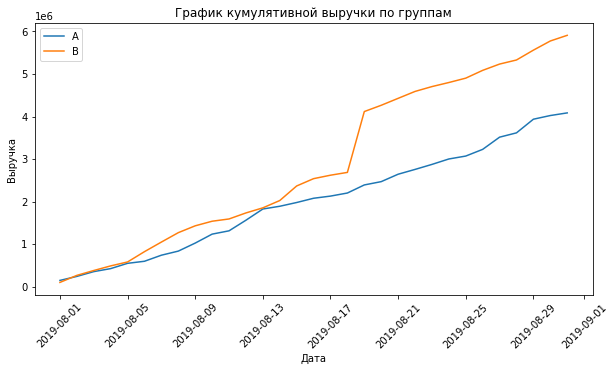

In [13]:
plt.figure(figsize=(10, 5))
#Построю графики кумулятивной выручки по дням и группам A/B-тестирования: 
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.legend() 
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation=45);

Вывод: В обеих группах выручка увеличивается во время всего теста. При этом в группе А рост довольной плавный и стабильный, а в группе B есть точка, где выручка резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека по группам

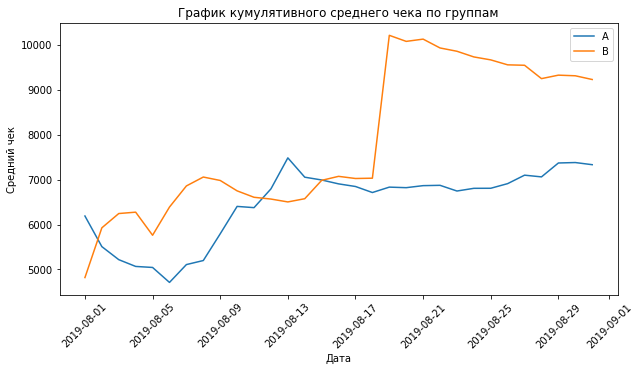

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=45);

Вывод: Средний чек для обеих групп растет на протяжении всего теста. Нельзя назвать его рост в обеих группах плавным, средний чек неравномерный,  есть точки резкого роста, для групп А и В они разные.  

###  График относительного изменения кумулятивного среднего чека группы B к группе A. 

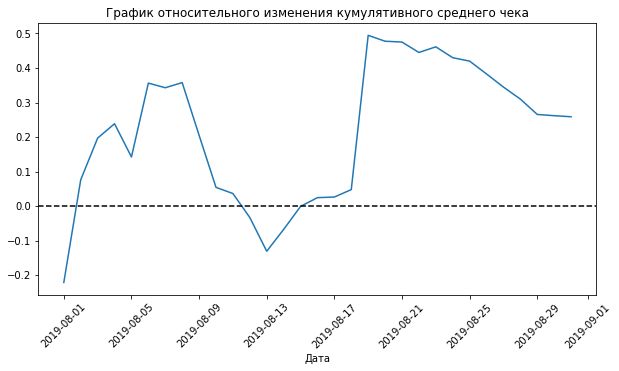

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека')
plt.xticks(rotation=45);

В нескольких точках график различия между сегментами резко «скачет», это опять же может быть связано с наличием в группе В более дорогих заказов в эти периоды или с резким ростом количества заказов в группе B.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам 

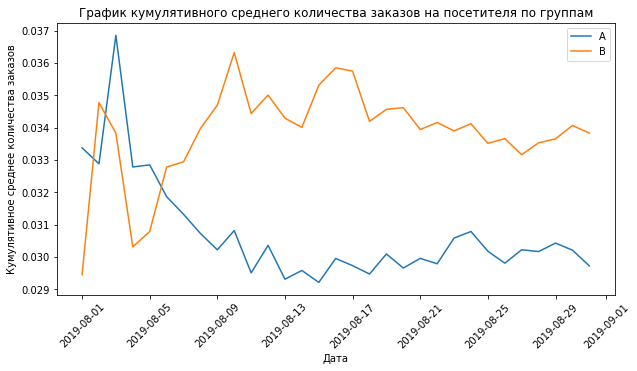

In [16]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количества заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=45);

Графики несимметричные, среднее количество заказов в группе В выше, чем в группе А. Изначально группы находились примерно около одного значения, были практически симметричные перепады, но затем количество заказов группы А сильно просело, а группы В наоборот увеличилось.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

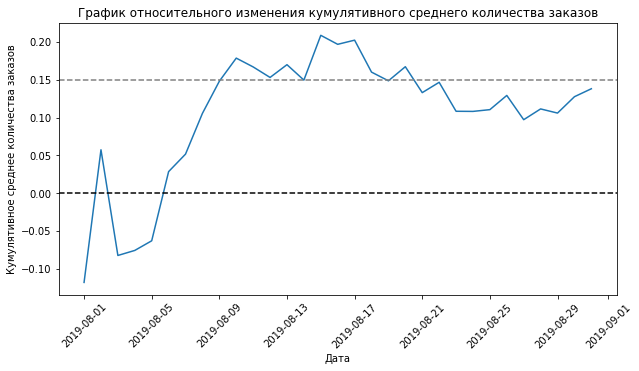

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количества заказов')
plt.title('График относительного изменения кумулятивного среднего количества заказов')
plt.xticks(rotation=45);

В начале теста наблюдались значительные колебания среднего количества заказов в группе B, но затем группа B вырвалась вперед, её среднее количество заказов на пользователя стабильно выше, чем в группе А, но все равно не стабильно. 

###  Точечный график количества заказов по пользователям

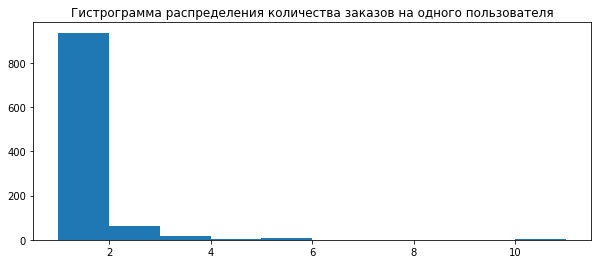

In [18]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.head(5)

plt.figure(figsize=(10,4))
plt.hist(ordersByUsers['orders'], bins = 10)
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.show()

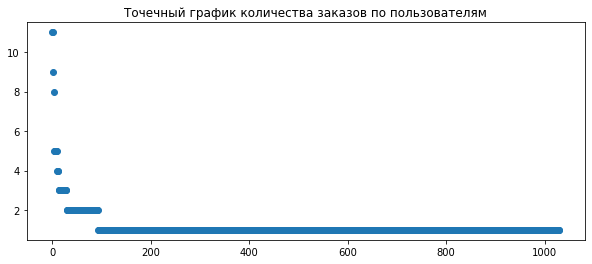

In [19]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.show()

С учетом данных графиков: очень небольшое количество пользователей совершают 2 и более заказов. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

 ### Считаем 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [20]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


Не более  5% пользователей оформляли больше чем 2 заказа, не более 1% - делали больше, чем 4 заказа. За границу для определения аномального количества заказов принимаем 95 перцентиль, т.е. 2 заказа. 

In [21]:
#Присвою переменной, которую буду использовать в дальнейшем результат расчета
abnormal_orders_amount = np.percentile(ordersByUsers['orders'], 95)

### Точечный график стоимостей заказов

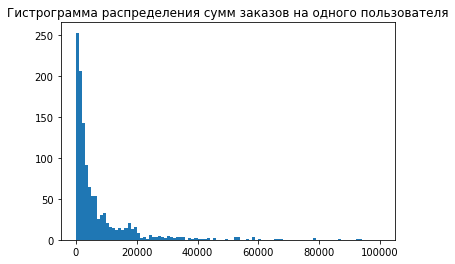

In [22]:
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.show()
x_values = pd.Series(range(0, len(orders)))

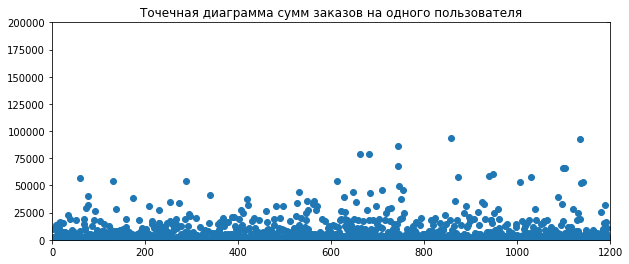

In [23]:
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.axis([0, 1200, 0, 200000])
plt.show()

Подавляющее большинство пользователей делает покупки на сумму не более 25 т.р. 

### Считаем 90, 95-й и 99-й перцентили стоимости заказов

In [24]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Только 5% пользователей совершают покупки на сумму более 28 т.р. В данном случае за границу для определения аномальных заказов можно принять сумму в 28 т.р.

In [25]:
#Присвою переменной, которую буду использовать в дальнейшем результат расчета
abnormal_orders_revenue = np.percentile(orders['revenue'], 95)

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов между группами нет. 

Альтернативная: различия в среднем между группами есть.

В качестве уровня значимости alpha  беру 0.05 (5%).
 
Для проверки гипотез буду использовать критерий Манна-Уитни. Этот метод подходит в случаях, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты, поэтому необходимо проверять гипотезу с учетом рангов, т.е. номеров значений в упорядоченном ряду. 

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
print('p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие в среднем между группами:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01679
Относительное различие в среднем между группами: 0.138


Вывод: P-value значительно меньше 0,05, относитетельный прирост среднего группы B  к среднему количеству заказов группы А равен 13,8%, т.е. в среднем количестве заказов между группами есть статистически значимые различия. Нулевую гипотезу отвергаем. 

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий в среднем чеке между группами по сырым данным. 

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть. 

В качестве уровня значимости alpha беру 0.05 (5%).

Для проверки гипотез буду использовать критерий Манна-Уитни. Этот метод подходит в случаях, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты, поэтому необходимо проверять гипотезу с учетом рангов, т.е. номеров значений в упорядоченном ряду.

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем между группами:' , '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительное различие в среднем между группами: 0.259


Вывод: P-value значительно больше 0,05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между группами всего 26%. Нулевую гипотезу не отвергаем. 

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [28]:
# Сделаю срезы пользователей с числом заказов больше 2 и пользователей, совершивших заказы дороже 28 000 р. 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > abnormal_orders_amount]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > abnormal_orders_amount]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > abnormal_orders_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64


Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя и среднем чеке между группами по очищенным данным после удаления аномальных пользователей.

Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов между группами нет. 

Альтернативная: различия в среднем между группами есть.

В качестве уровня значимости alpha беру 0.05 (5%).

Для проверки гипотез буду использовать критерий Манна-Уитни. Этот метод подходит в случаях, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты, поэтому необходимо проверять гипотезу с учетом рангов, т.е. номеров значений в упорядоченном ряду.

In [29]:
#Посчитаю статистическую значимость различия среднего количества заказов после удаления аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('p-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в среднем между группами:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.01304
Относительное различие в среднем между группами: 0.173


Вывод: P-value значительно меньше 0,05, относитетельный прирост среднего группы B  к среднему количеству заказов группы А равен 17,3%, т.е. в среднем количестве заказов между группами после очистки данных от аномалий есть статистически значимые различия, как и с сырыми данными. Нулевую гипотезу отвергаем. 

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Проверим статистическую значимость различий в среднем чеке между группами по очищенным данным.

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

В качестве уровня значимости alpha беру 0.05 (5%).

Для проверки гипотез буду использовать критерий Манна-Уитни. Этот метод подходит в случаях, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты, поэтому необходимо проверять гипотезу с учетом рангов, т.е. номеров значений в упорядоченном ряду.

In [30]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие в среднем между группами:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.738
Относительное различие в среднем между группами: -0.020


Вывод: Как и в случае с сырыми данными P-value значительно больше 0,05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между группами -0,2%. Нулевую гипотезу не отвергаем.

### Выводы

В первой части проекта была проведена приритизация предложенных гипотез. Приоритизация важна для того, чтобы понять, какие из гипотез следует тестировать, а какие не повлияют на ключевые метрики бизнеса и приведут к нерациональной трате ресурсов. 

Приоритизация гипотез проводилась на основе методов IСE и RICE. 

Наиболее перспективными гипотезами по итогу считаем гипотезы под номерами 7 и 0. Эти гипотезы попали в первую тройку при применении 2 методов:

Гипотеза под номером 7: *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*

Гипотеза 0:  *Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*

Во второй части проекта проанализированы результаты уже проведенного A/B теста. 

Чтобы отследить изменения результатов эксперимента на каждый день тестирования, были построены графики кумулятивной выручки, кумулятивного среднего чека по группам, 
относительного изменения кумулятивного среднего чека, кумулятивного среднего количества заказов на посетителя, относительного изменения кумулятивного среднего количества заказов.

Были выбраны границы для определения аномальных количества заказов на пользователя и среднего чека. Для этого строили графики количества заказов по пользователям, стоимостей заказов, определяли 90, 95 и 99 перцентили количества заказов на пользователя и стоимости заказов.

Также были проверены 4 гипотезы: о статистической значимости различий в среднем чеке между группами и о статистической значимости различий в среднем количестве заказов на посетителя между группами. Обе гипотезы проверялись 2 раза, на "сырых" данных и на данных очищенных от аномалий. 

По итогам анализа результатов A/B теста, видим следующие результаты:

Есть статистически значимое различие в среднем количестве заказов на посетителя между группами, как в сырых данных, так и в данных после фильтрации аномалий.

Статистически значимого различия по среднему чеку между группами нет ни в сырых, ни в очищенных данных. 

Результаты группы B на протяжении тестирования лучше резульататов группы A: среднее количество заказов на пользователя в группе B  стабильно выше, чем в группе А. 

На протяжении всего теста выручка стабильно растет, в группе B выручка выше, чем в группе А, и хотя средний чек в группах не отличается, это происходит засчет большего количества заказов на пользователя в группе B. 

Исходя из результатов, полученных в ходе тестирования, на данном этапе тест нужно остановить, признать его успешным и зафиксировать победу группы B. 